## Investigation on my rents in the past 11 months

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = '1.txt.csv'
header = ['Date', 'Description', 'Payments', "Charges", 'Balance']
balance = pd.read_csv(path, names=header)

In [4]:
times, cols = balance.shape
print(f"Total {times} transactions occured")

Total 55 transactions occured


In [5]:
balance.head()

,Date,Description,Payments,Charges,Balance
0,8/9/2022,Payment,$0.00,"($3,145.21)",$0.00
1,8/4/2022,CLEANING - APPLIANCES,$50.00,$0.00,"($3,145.21)"
2,8/4/2022,DAMAGE/CLEANING - TILES,$50.00,$0.00,"($3,195.21)"
3,8/4/2022,CLEANING - SINK/KITCHEN,$25.00,$0.00,"($3,245.21)"
4,8/4/2022,DAMAGE/CLEANING - COUNTERTOP,$25.00,$0.00,"($3,270.21)"


In [6]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         55 non-null     object
 1   Description  55 non-null     object
 2   Payments     55 non-null     object
 3   Charges      55 non-null     object
 4   Balance      55 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


### Data cleaning

In [7]:
# remove $ sign
balance.iloc[:,2:5] = balance.iloc[:,2:5].apply(lambda x: x.str.replace('$',''))
# replace () with "-", negative
balance.iloc[:,2:5] = balance.iloc[:,2:5].apply(lambda x: x.str.replace('(','-'))
balance.iloc[:,2:5] = balance.iloc[:,2:5].apply(lambda x: x.str.replace(')',''))
balance.iloc[:,2:5] = balance.iloc[:,2:5].apply(lambda x: x.str.replace(',',''))

In [8]:
# make sure numbers are float
for col in range(2,5):
    balance.iloc[:,col] = balance.iloc[:,col].apply(float)

In [9]:
import datetime as dt
# make Date variable datetime
balance['Date'] = pd.to_datetime(balance['Date']).dt.date

## EDA

In [16]:
# see if all charges are clear
(balance['Payments'] - balance['Charges']).sum().round()

0.0

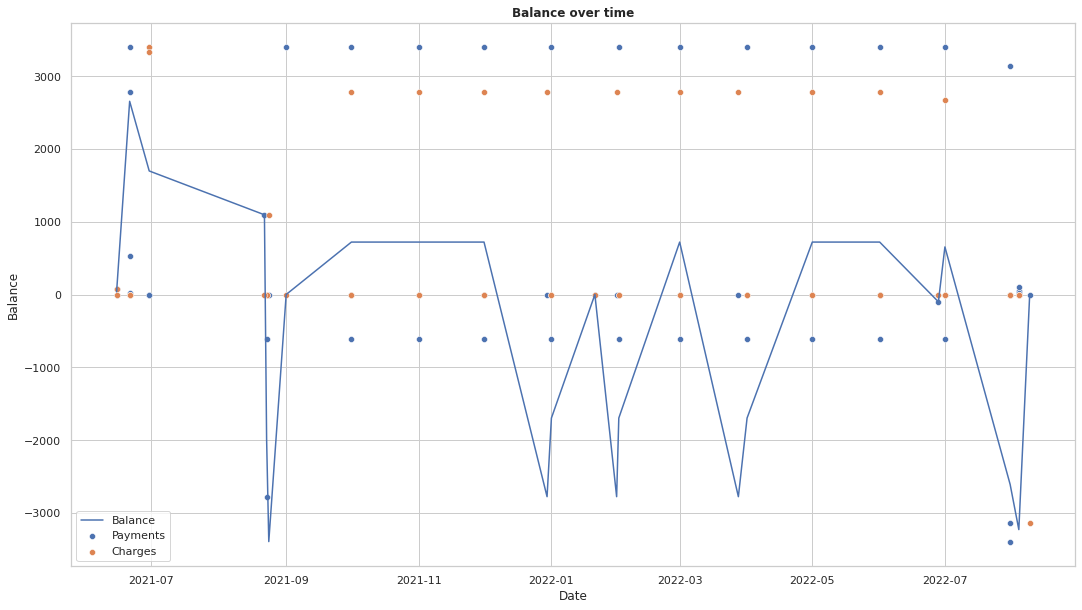

In [17]:
# lets visualize the payments, charges, and balance in past 11 months
f, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style="whitegrid")

sns.lineplot(data=balance, x='Date', y='Balance', ci=None)
sns.scatterplot(data=balance, x='Date', y='Payments')
sns.scatterplot(data=balance, x='Date', y='Charges')
        
plt.title('Balance over time', fontweight ="bold")
plt.legend(labels=["Balance", "Payments", 'Charges']);